
📊 Model: RandomForest
MSE: 5.352007104572178
R² Score: 0.9499474228660432

📊 Model: GradientBoosting
MSE: 8.50628638112785
R² Score: 0.9204482455093896

📊 Model: NeuralNetwork
MSE: 7.6136231995907
R² Score: 0.9287965327735006


C:\Users\TAMANNA\anaconda3\envs\ai_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


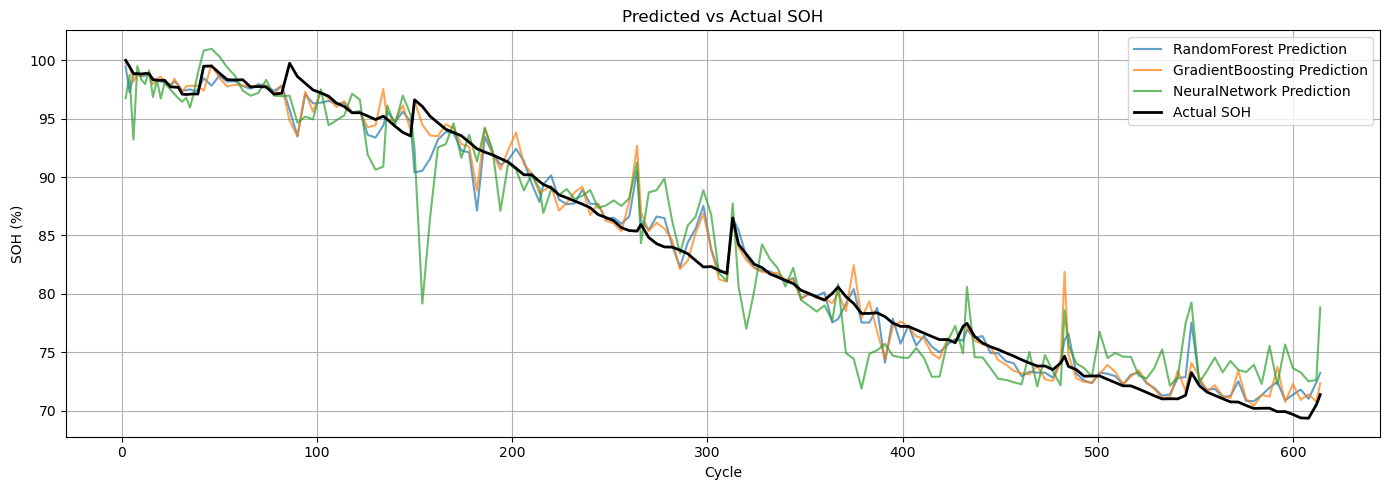

✅ ML predictions saved to 'B0005_ML_predictions.csv'


In [28]:
# 📌 Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 📂 Step 1: Load Data
df = pd.read_csv("B0005_cycle_summary.csv")

# 🎯 Step 2: Features and Target
features = ['Voltage_Min', 'Voltage_Max', 'Temperature_Avg']
target = 'SOH (%)'

X = df[features]
y = df[target]

# 📉 Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 4: Define Models (Neural Net uses pipeline with scaler)
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'NeuralNetwork': Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(
            hidden_layer_sizes=(64, 64),
            activation='relu',
            solver='adam',
            alpha=0.001,
            max_iter=2000,
            random_state=42
        ))
    ])
}

# 🧪 Step 5: Train + Evaluate Models
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_full = model.predict(X)
    predictions[name] = y_pred_full

    print(f"\n📊 Model: {name}")
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("R² Score:", r2_score(y_test, y_pred_test))

# 📈 Step 6: Plot Predictions vs Actual
plt.figure(figsize=(14, 5))
for name, y_pred_full in predictions.items():
    plt.plot(df['Cycle_Index'], y_pred_full, label=f'{name} Prediction', alpha=0.7)

plt.plot(df['Cycle_Index'], y, label='Actual SOH', color='black', linewidth=2)
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.title('Predicted vs Actual SOH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 💾 Step 7: Save Predictions
for name, y_pred_full in predictions.items():
    df[f'{name}_SOH_Pred'] = y_pred_full

df.to_csv("B0005_ML_predictions.csv", index=False)
print("✅ ML predictions saved to 'B0005_ML_predictions.csv'")